In [235]:
import keras
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model
from IPython.display import clear_output
from keras import optimizers

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline


In [236]:
features = ['MIP', 'SIP','EKIP','SKIP','MDM-SR','SDM-SR','EKDM-SR','SKDM-SR','Target']
df =  pd.read_csv('pulsar_stars.csv',
                names=features,na_values='?',header=None, skiprows = 1)
df = df.dropna()
df.head(6)

,MIP,SIP,EKIP,SKIP,MDM-SR,SDM-SR,EKDM-SR,SKDM-SR,Target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [237]:

#pulsar = np.array((df.loc[:,'MIP':'Target']))
# Get the appropriate data from the datafile using the column headers
pulsar_x= np.array((df.loc[:,'MIP':'SKDM-SR']))
pulsar_y= np.array((df.loc[:,'Target']))

# Reshape the features and target vector
pulsar_x=pulsar_x.reshape(pulsar_x.shape[0],8)
pulsar_y=pulsar_y.reshape(pulsar_y.shape[0],1)

# Check the shape
print(pulsar_x.shape)
print(pulsar_y.shape)


(17898, 8)
(17898, 1)


In [238]:
# Scale the features, mean center and standard deviation = 1
x_scale = preprocessing.scale(pulsar_x)

# Default test size of 0.25 of dataset, default shuffle=true, 
x_train, x_test, y_train, y_test = train_test_split(x_scale, pulsar_y)
y_train = y_train.reshape((y_train.shape[0]), 1)

#Check the shape 
print(y_train.shape)
print(x_train.shape)

(13423, 1)
(13423, 8)


# Neural Networks
In the following section, we will run our data set through various neural networks with different hyper parameters. We will vary the activation function (tanh, reLU, sigmoid), the number of inputs in the hidden layer (10, 100, 200), and the number of hidden layers (1, 2, 5, with 100 nodes in each hidden layer). Weights and biases will be initialized randomly.  

In [253]:
def neural_network(nin, nh, nout, nhl, act):
    model = Sequential();
    for x in range(0,nhl):
        model.add(Dense(nh, input_shape=(nin,), activation=act, name="hidden"+str(x)))
    model.add(Dense(nout, activation="sigmoid", name="output"))
    
    # Compile all models
    opt = optimizers.Adam(lr=0.001)
    
    model.compile(optimizer=opt, 
             loss="binary_crossentropy",
             metrics=["accuracy"])
    
    return model

def train_network(model, x_train, y_train, x_test, y_test):
    history = model.fit(x_train, y_train, epochs=10, batch_size=100, 
                validation_data=(x_test, y_test), verbose=1)
    return history

def plot_acc(history, title):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()
    
def plot_loss(history, title):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['acc', 'val_acc'], loc='upper right')
    plt.show()

# Network 8-100-1, Sigmoid

Train on 13423 samples, validate on 4475 samples
Epoch 1/10
13423/13423 [==============================] - 1s 41us/step - loss: 0.1999 - acc: 0.9382 - val_loss: 0.1216 - val_acc: 0.9609
Epoch 2/10
13423/13423 [==============================] - 0s 11us/step - loss: 0.1122 - acc: 0.9668 - val_loss: 0.0988 - val_acc: 0.9705
Epoch 3/10
13423/13423 [==============================] - 0s 11us/step - loss: 0.0983 - acc: 0.9709 - val_loss: 0.0898 - val_acc: 0.9734
Epoch 4/10
13423/13423 [==============================] - 0s 11us/step - loss: 0.0918 - acc: 0.9731 - val_loss: 0.0845 - val_acc: 0.9752
Epoch 5/10
13423/13423 [==============================] - 0s 10us/step - loss: 0.0880 - acc: 0.9735 - val_loss: 0.0816 - val_acc: 0.9768
Epoch 6/10
13423/13423 [==============================] - 0s 10us/step - loss: 0.0853 - acc: 0.9744 - val_loss: 0.0794 - val_acc: 0.9774
Epoch 7/10
13423/13423 [==============================] - 0s 11us/step - loss: 0.0835 - acc: 0.9751 - val_loss: 0.0777 - val_acc:

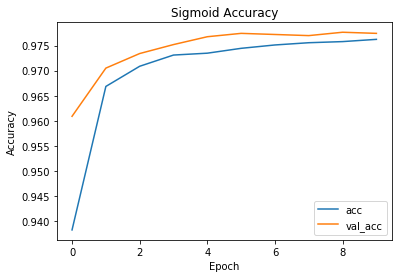

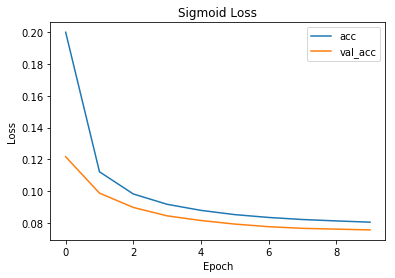

accuracy = 0.977430


In [254]:
K.clear_session()

modelArr = []
# Number of nodes in input layer = number of features = 8
nin = x_train.shape[1];
# Number of hidden layer nodes
nh = 100;
# Number of output nodes
nout = 1;

model_sig = neural_network(nin, nh, nout, 1, "sigmoid")
sig_history = train_network(model_sig, x_train, y_train, x_test, y_test);
plot_acc(sig_history, "Sigmoid Accuracy")
plot_loss(sig_history, "Sigmoid Loss")

modelArr.append(model_sig)

model_sig.save("model_sig");
from keras.models import load_model

score, acc = model_sig.evaluate(x_test, y_test, verbose = 0)
print("accuracy = %f" % acc)





# # We wil use sigmoid as our activation here with 100 units in the hidden layer
# model_sig = Sequential();
# model_sig.add(Dense(nh, input_shape=(nin,), activation="sigmoid", name="hidden"))
# model_sig.add(Dense(nout, activation="sigmoid", name="output"))

# # We will use tanh as our activation here with 100 units in the hidden layer
# model_tanh = Sequential();
# model_tanh.add(Dense(nh, input_shape=(nin,), activation="tanh", name="hidden"))
# model_tanh.add(Dense(nout, activation="sigmoid", name="output"))

# # We will use reLU as out activation here with 100 units in the hidden layer
# model_relu = Sequential();
# model_relu.add(Dense(nh, input_shape=(nin,), activation="relu", name="hidden"))
# model_relu.add(Dense(nout, activation="sigmoid", name="output"))


# # We will use 10 hidden units in our network here with sigmoid as activation
# nh = 10;
# model_ten = Sequential();
# model_ten.add(Dense(nh, input_shape=(nin,), activation="sigmoid", name="hidden"))
# model_ten.add(Dense(nout, activation="sigmoid", name="output"))
# # We will use 200 hidden units in our network here with sigmoid as activation
# nh = 200; 
# model_twohund = Sequential();
# model_twohund.add(Dense(nh, input_shape=(nin,), activation="sigmoid", name="hidden"))
# model_twohund.add(Dense(nout, activation="sigmoid", name="output"))


# # We will have 3 hidden layers in this network with 100 units each, sigmoid as activation
# nh = 100
# model_twolayer = Sequential();
# model_twolayer.add(Dense(nh, input_shape=(nin,), activation="sigmoid", name="hidden"))
# model_twolayer.add(Dense(nh, input_shape=(nin,), activation="sigmoid", name="hidden_two"))
# model_twolayer.add(Dense(nout, activation="sigmoid", name="output"))
    
# # We will have 5 hidden layers in this network with 100 units each, sigmoid as activation
# model_fivelayer = Sequential();
# for x in range(0, 5):
#     model_fivelayer.add(Dense(nh, input_shape=(nin,), activation="sigmoid", name="hidden" + str(x)))
# model_fivelayer.add(Dense(nout, activation="sigmoid", name="output"))

# modelArr = [model_sig, model_tanh, model_relu, model_ten, model_twohund, model_twolayer, 
#            model_fivelayer];


## Network 8-100-1, ReLU

## Network 8-100-1, tanh

## Network 8-10-1, sigmoid

## Network 8-200-1, sigmoid

## Nwtwork 8-100-100-1 sigmoid

## Network 8-100-100-100-100-100-1, sigmoid

In [204]:
from keras import optimizers

# Compile all models
opt = optimizers.Adam(lr=0.001)

for model in modelArr: 
    model.compile(optimizer=opt, 
             loss="binary_crossentropy",
             metrics=["accuracy"])



## Train and Save All Models

In [205]:
for model in modelArr:
    model.fit(x_train, y_train, epochs=10, batch_size=100, 
                validation_data=(x_test, y_test), verbose=0)

# history = model_sig.fit(x_train, y_train, epochs=10, batch_size=100, 
#                 validation_data=(x_test, y_test), verbose=0)

# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('ReLU Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['acc', 'val_acc'], loc='lower right')
# plt.show()

model_sig.save("model_sig");
model_relu.save("model_relu");
model_tanh.save("model_tanh");
model_ten.save("model_ten");
model_twohund.save("model_twohund");
model_twolayer.save("model_twolayer");
model_fivelayer.save("model_fivelayer");
    

In [206]:
from keras.models import load_model

model = load_model("model_sig")


C:\Users\Zafir\Anaconda3\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [207]:
score, acc = model.evaluate(x_test, y_test, verbose = 0)
print("accuracy = %f" % acc)

accuracy = 0.978994
